In [2]:
def studentReg(ages_train, net_worths_train):
    ### import the sklearn regression module, create, and train your regression
    from sklearn import linear_model

    ### name your regression reg
    reg=linear_model.LinearRegression()
    ### your code goes here!
    reg.fit(ages_train, net_worths_train)
    return reg

In [12]:
def ageNetWorthData():

    random.seed(42)
    numpy.random.seed(42)

    ages = []
    for ii in range(100):
        ages.append( random.randint(20,65) )
    net_worths = [ii * 6.25 + numpy.random.normal(scale=40.) for ii in ages]
### need massage list into a 2d numpy array to get it to work in LinearRegression
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    from sklearn.cross_validation import train_test_split
    ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths)

    return ages_train, ages_test, net_worths_train, net_worths_test

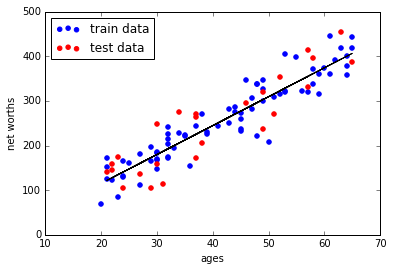

In [20]:
import numpy
import matplotlib
import random
matplotlib.use('agg')

import matplotlib.pyplot as plt
#from studentRegression import studentReg
from class_vis import prettyPicture, output_image

#from ages_net_worths import ageNetWorthData

        ages_train, ages_test, net_worths_train, net_worths_test = ageNetWorthData()



reg = studentReg(ages_train, net_worths_train)


%matplotlib inline
plt.clf()
plt.scatter(ages_train, net_worths_train, color="b", label="train data")
plt.scatter(ages_test, net_worths_test, color="r", label="test data")
plt.plot(ages_test, reg.predict(ages_test), color="black")
plt.legend(loc=2)
plt.xlabel("ages")
plt.ylabel("net worths")

plt.show()

In [55]:
ssres=pow(reg.predict(ages_test)-net_worths_test,2).sum()
ssmean=net_worths_test.sum()/len(ages_test)
sstot=pow(net_worths_test-ssmean,2).sum()
print 'test r2',1-(ssres/sstot)
ssres=pow(reg.predict(ages_train)-net_worths_train,2).sum()
ssmean=net_worths_train.sum()/len(ages_train)
sstot=pow(net_worths_train-ssmean,2).sum()
print 'train r2',1-(ssres/sstot)

test r2 0.812365729231
train r2 0.874588235822


In [42]:
print reg.score(ages_test,net_worths_test)
print reg.score(ages_train,net_worths_train)
print reg.intercept_
print reg.coef_

0.812365729231
0.874588235822
[-14.35378331]
[[ 6.47354955]]


In [48]:
reg.predict([[27]])[0][0]

160.43205453082507